<a href="https://colab.research.google.com/github/robd123/AML/blob/main/Project3/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 686 Project 3


*   This project uses the heart disease data set, original data is available here: https://www.kaggle.com/ronitf/heart-disease-uci
*   The purpose of this project is to use Logistic, SGC, and Random Forest Classifiers to predict heart disease based on a number of factors.
*   Th results of each of these methods are compared to each other



**Import Dataset**

In [1]:
import urllib.request
import os
datapath = os.path.join("datasets", "heart", "")
os.makedirs(datapath, exist_ok=True)
file_path = "https://raw.githubusercontent.com/robd123/AML/main/Project3/heart.csv"
urllib.request.urlretrieve(file_path, datapath + "heart.csv")

('datasets/heart/heart.csv', <http.client.HTTPMessage at 0x7fc180776f90>)

**Get Dataset as a DataFrame**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

heart_data = pd.read_csv(datapath + "heart.csv", thousands=',')
heart_data['target'] = pd.Categorical(heart_data["target"])
print(heart_data.head())

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]


**Plot of Age Distribution of Heart Disease**

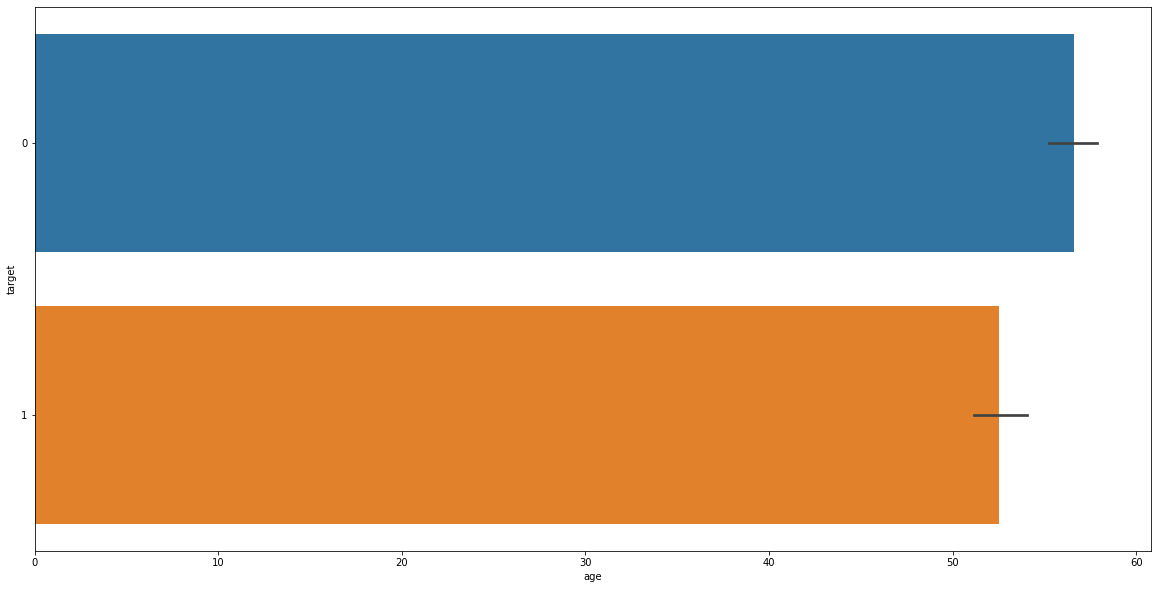

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.barplot(x="age",y="target",data=heart_data)

**Plot of Sex Distribution of Heart Disease**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


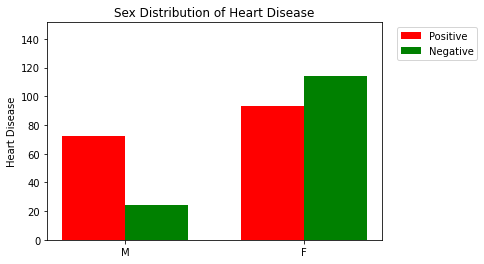

In [38]:
#plt.figure(figsize=(20,10))
#sns.barplot(x="sex",y="target",data=heart_data)

count_m_neg = len(heart_data[heart_data.sex == 0][heart_data.target == 0])
count_m_pos = len(heart_data[heart_data.sex == 0][heart_data.target == 1])
count_f_neg = len(heart_data[heart_data.sex == 1][heart_data.target == 0])
count_f_pos = len(heart_data[heart_data.sex == 1][heart_data.target == 1])


positive_counts = [count_m_pos, count_f_pos]
negative_counts =  [count_m_neg, count_f_neg]

labels = ['M', 'F']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, positive_counts, width, label='Positive', color='red')
rects2 = ax.bar(x + width/2, negative_counts, width, label='Negative', color='green')

ax.set_ylabel('Heart Disease')
ax.set_xticks(x)
ax.set_ylim(0,len(heart_data)/2)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

plt.title('Sex Distribution of Heart Disease')
plt.show()

**Impute Missing Values and Scale Dataset**

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

heart_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

heart_data_scaled = heart_pipeline.fit_transform(heart_data)
heart_data_scaled = pd.DataFrame(heart_data_scaled, columns = heart_data.columns)
print(heart_data_scaled.head())


        age       sex        cp  ...        ca      thal    target
0  0.952197  0.681005  1.973123  ... -0.714429 -2.148873  0.914529
1 -1.915313  0.681005  1.002577  ... -0.714429 -0.512922  0.914529
2 -1.474158 -1.468418  0.032031  ... -0.714429 -0.512922  0.914529
3  0.180175  0.681005  0.032031  ... -0.714429 -0.512922  0.914529
4  0.290464 -1.468418 -0.938515  ... -0.714429 -0.512922  0.914529

[5 rows x 14 columns]


**Determine Pearson Correlation of Heart Disease with Features**

In [6]:
heart_data_scaled.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

**Pearson Correlation as a Heatmap**

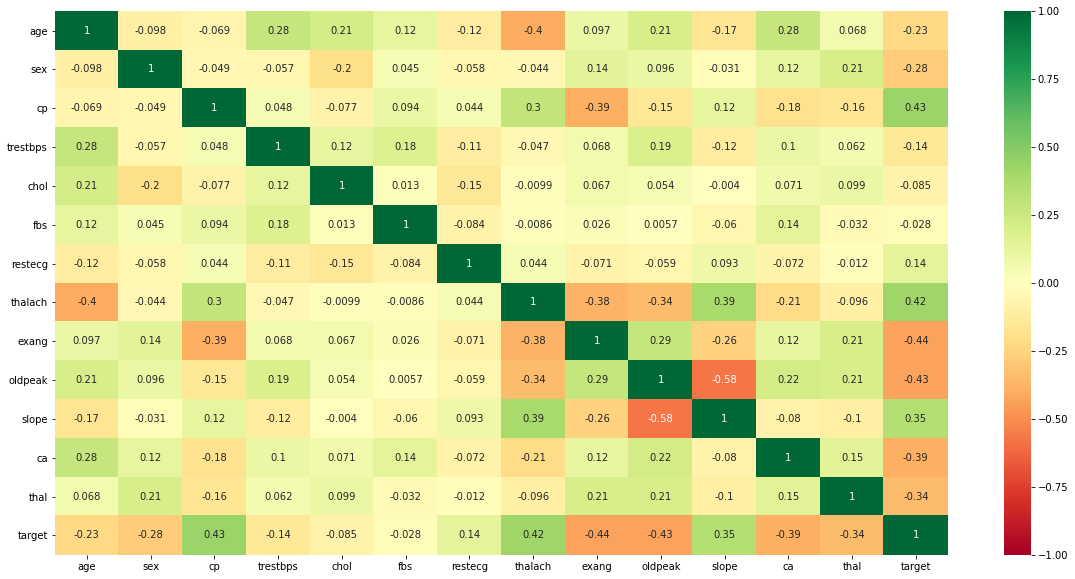

In [7]:
corr = heart_data_scaled.corr(method="pearson")
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='RdYlGn', vmin=-1, vmax=+1)

**Split Train and Test Data**

In [8]:
from sklearn.model_selection import train_test_split

Y = heart_data[['target']]
X = heart_data_scaled.drop(columns = ['target'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)  # Use 80/20 split
print(X_train)

          age       sex        cp  ...     slope        ca      thal
74  -1.253580 -1.468418  1.002577  ... -0.649113 -0.714429 -0.512922
153  1.283063 -1.468418  1.002577  ... -0.649113  0.265082 -0.512922
64   0.400752  0.681005  1.002577  ...  0.976352 -0.714429 -0.512922
296  0.952197 -1.468418 -0.938515  ... -0.649113 -0.714429 -0.512922
287  0.290464  0.681005  0.032031  ...  0.976352  0.265082 -0.512922
..        ...       ...       ...  ...       ...       ...       ...
251 -1.253580  0.681005 -0.938515  ... -0.649113  3.203615  1.123029
192 -0.040403  0.681005 -0.938515  ... -0.649113  0.265082  1.123029
117  0.180175  0.681005  1.973123  ... -0.649113 -0.714429  1.123029
47  -0.812425  0.681005  1.002577  ...  0.976352 -0.714429 -0.512922
172  0.400752  0.681005  0.032031  ... -0.649113 -0.714429 -0.512922

[242 rows x 13 columns]


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, Y_train)
heart_data_pred_lr = lr_classifier.predict(X_test)

labels = [0, 1]
lr_cm = confusion_matrix(Y_test, heart_data_pred_lr, labels=labels)

lr_train_score = round(lr_classifier.score(X_train, Y_train), 2)
lr_test_score = round(lr_classifier.score(X_test, Y_test), 2)

pd.DataFrame(lr_cm, index=labels, columns=labels)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0,1
0,21,6
1,3,31


In [10]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(max_iter=10000, tol=1e-5)

sgd_classifier.fit(X_train, Y_train)

heart_data_pred_sgc = sgd_classifier.predict(X_test)

labels = [0, 1]
sgd_cm = confusion_matrix(Y_test, heart_data_pred_sgc, labels=labels)

sgd_train_score = round(sgd_classifier.score(X_train, Y_train), 2)
sgd_test_score = round(sgd_classifier.score(X_test, Y_test), 2)

pd.DataFrame(sgd_cm, index=labels, columns=labels)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0,1
0,21,6
1,6,28


In [11]:
from sklearn.ensemble import RandomForestClassifier 

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, Y_train)
heart_data_pred_rf = rf_classifier.predict(X_test)

labels = [0, 1]
rf_cm = confusion_matrix(Y_test, heart_data_pred_rf, labels=labels)

rf_train_score = round(rf_classifier.score(X_train, Y_train), 2)
rf_test_score = round(rf_classifier.score(X_test, Y_test), 2)

pd.DataFrame(rf_cm, index=labels, columns=labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


,0,1
0,22,5
1,3,31


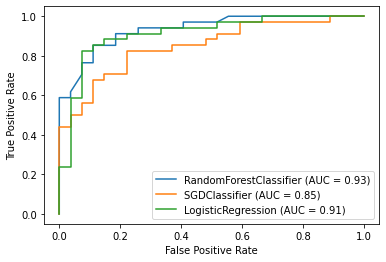

In [12]:
from sklearn.metrics import plot_roc_curve


ax = plt.gca()
rfc_disp = plot_roc_curve(rf_classifier, X_test, Y_test, ax=ax)
sgd_disp = plot_roc_curve(sgd_classifier, X_test, Y_test, ax=ax)
lr_disp = plot_roc_curve(lr_classifier, X_test, Y_test, ax=ax)

plt.show()

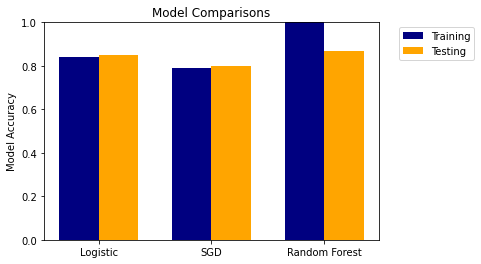

In [13]:
training_scores = [lr_train_score, sgd_train_score, rf_train_score]
testing_scores =  [lr_test_score, sgd_test_score, rf_test_score]

labels = ['Logistic', 'SGD', 'Random Forest']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

ax.set_ylabel('Model Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

plt.title('Model Comparisons')
plt.show()